# Logistic Regression

In [63]:
import torch
import torch.nn as nn 

In [64]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [65]:
samples = 1000
dims  = 5
M = 2
X , y = make_classification(n_samples=samples, n_features=dims, n_classes=M, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_train.shape, y_train.shape , X_test.shape, y_test.shape
X_train.dtype , y_train.dtype
X_train[:5], y_train[:5]

((670, 5), (670,), (330, 5), (330,))

(dtype('float64'), dtype('int32'))

(array([[-1.40396527, -0.19080239,  2.27314571,  2.25571312,  0.34138905],
        [-0.5788093 , -1.25106643, -0.83334933,  0.71723953, -0.04569992],
        [ 0.23264306, -0.93679208, -1.83910137, -0.54948664,  0.84451844],
        [-2.70137805, -5.38007749, -3.19648007,  3.43069536, -0.83867741],
        [-0.27394283, -0.4928228 , -0.24447088,  0.35747503, -0.46098237]]),
 array([1, 0, 0, 0, 0]))

In [66]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [67]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).view(y_train.shape[0], 1) 
y_test = torch.from_numpy(y_test.astype(np.float32)).view(y_test.shape[0], 1) 
X_train.shape, y_train.shape , X_test.shape, y_test.shape

(torch.Size([670, 5]),
 torch.Size([670, 1]),
 torch.Size([330, 5]),
 torch.Size([330, 1]))

In [68]:
type(X_train) , X_train.shape , y_train.shape 

(torch.Tensor, torch.Size([670, 5]), torch.Size([670, 1]))

In [69]:
samples, dims = X_train.shape
input_size = dims
output_size = 1
learning_rate = 0.01
epochs = 3000

Epoch: 0, Loss: 1.120671033859253, Accuracy: 0.32686567306518555
Epoch: 300, Loss: 0.573491632938385, Accuracy: 0.7343283295631409
Epoch: 600, Loss: 0.4450971484184265, Accuracy: 0.8298507332801819
Epoch: 900, Loss: 0.40250644087791443, Accuracy: 0.858208954334259
Epoch: 1200, Loss: 0.3833097219467163, Accuracy: 0.858208954334259
Epoch: 1500, Loss: 0.3729659616947174, Accuracy: 0.8611940145492554
Epoch: 1800, Loss: 0.3667619526386261, Accuracy: 0.8611940145492554
Epoch: 2100, Loss: 0.3627743124961853, Accuracy: 0.8626865744590759
Epoch: 2400, Loss: 0.3600865602493286, Accuracy: 0.8597015142440796
Epoch: 2700, Loss: 0.3582119941711426, Accuracy: 0.8597015142440796


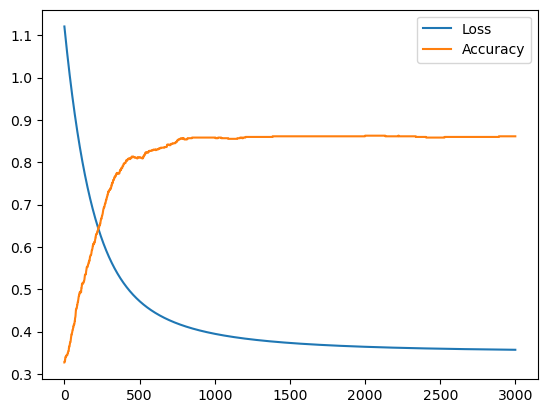

In [70]:
weights = torch.randn(input_size, output_size, requires_grad=True)
bias = torch.zeros(output_size, requires_grad=True)

def sigmoid(x):
    return 1/(1 + torch.exp(-x))

def model(x):
    return sigmoid(x @ weights + bias)

def cross_entropy(y_hat, y):
    return -(y * torch.log(y_hat) + (1-y) * torch.log(1-y_hat)).mean()

def accuracy(y_hat, y):
    y_hat_cls = y_hat.round()
    return (y_hat_cls == y).float().mean()

losses = []
accs = []

for epoch in range(epochs):
    y_hat = model(X_train)
    loss = cross_entropy(y_hat, y_train)
    loss.backward()
    with torch.no_grad():
        weights -= weights.grad * learning_rate
        bias -= bias.grad * learning_rate
        _ = weights.grad.zero_()
        _ = bias.grad.zero_()
    acc = accuracy(y_hat, y_train)
    losses.append(loss.item())
    accs.append(acc.item())
    if epoch % (epochs/10) == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}, Accuracy: {acc.item()}')

plt.plot(losses, label='Loss')
plt.plot(accs, label='Accuracy')
plt.legend()
plt.show()

In [71]:
y_pred = model(X_test)
print(f'loss : {cross_entropy(y_pred, y_test).item()}') 
print(f'Accuracy: {accuracy(y_pred, y_test).item()}')

loss : 0.3555544912815094
Accuracy: 0.8393939137458801


In [72]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_cls = y_pred.round()
    acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'Accuracy: {acc.item()}')

Accuracy: 0.8393939137458801


In [73]:
model = nn.Linear(input_size, output_size) 
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Epoch:     0, Loss: 0.70786
Epoch:   300, Loss: 0.45799
Epoch:   600, Loss: 0.40781
Epoch:   900, Loss: 0.38626
Epoch:  1200, Loss: 0.37478
Epoch:  1500, Loss: 0.36794
Epoch:  1800, Loss: 0.36357
Epoch:  2100, Loss: 0.36064
Epoch:  2400, Loss: 0.35861
Epoch:  2700, Loss: 0.35716


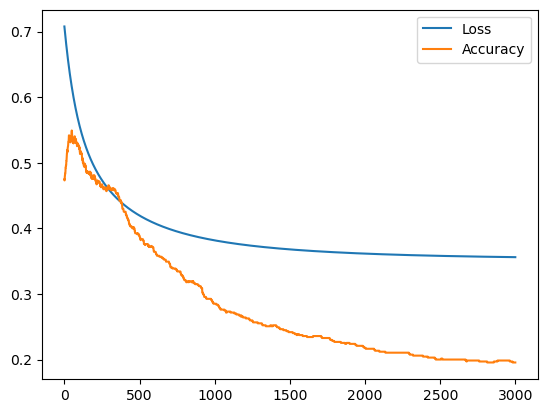

In [74]:
losses = []
accs = []
for ep in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()

    losses.append(loss.item())
    acc = accuracy(y_pred, y_train)
    accs.append(acc.item())
    
    optimizer.step()
    optimizer.zero_grad() 

    if ep % (epochs/10) == 0:
        print(f'Epoch: {ep:5d}, Loss: {loss.item():.5f}')


plt.plot(losses, label='Loss')
plt.plot(accs, label='Accuracy')
plt.legend()
plt.show()

In [75]:

with torch.no_grad():
    y_pred = model(X_test)
    y_pred_cls = y_pred.round()
    acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'Accuracy: {acc.item()}')


Accuracy: 0.17575757205486298


Epoch:     0, Loss: 0.62533
Epoch:   300, Loss: 0.43728
Epoch:   600, Loss: 0.39948
Epoch:   900, Loss: 0.38210
Epoch:  1200, Loss: 0.37241
Epoch:  1500, Loss: 0.36647
Epoch:  1800, Loss: 0.36261
Epoch:  2100, Loss: 0.35998
Epoch:  2400, Loss: 0.35814
Epoch:  2700, Loss: 0.35682


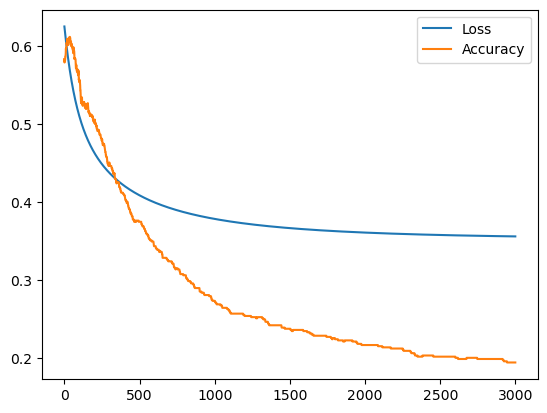

[Parameter containing:
 tensor([[-0.4768,  1.3114,  1.6989,  0.5449,  0.0077]], requires_grad=True),
 Parameter containing:
 tensor([-0.0619], requires_grad=True)]

In [76]:
class LogRes(nn.Module):
    def __init__(self):
        super(LogRes, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        return self.linear(x)
    
model = LogRes()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


losses = []
accs = []
for ep in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad() 

    losses.append(loss.item())
    acc = accuracy(y_pred, y_train)
    accs.append(acc.item())

    if ep % (epochs/10) == 0:
        print(f'Epoch: {ep:5d}, Loss: {loss.item():.5f}')

plt.plot(losses, label='Loss')
plt.plot(accs, label='Accuracy')
plt.legend()
plt.show()

params = list(model.parameters())
params

In [77]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_cls = y_pred.round()
    acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'Accuracy: {acc.item()}')

Accuracy: 0.17878787219524384


In [78]:
params[0].shape, params[1].shape

(torch.Size([1, 5]), torch.Size([1]))

In [79]:
w, b  = params
w = w.data.numpy()
b = b.data.numpy()
w, b

(array([[-0.47681546,  1.3114161 ,  1.6988993 ,  0.54492235,  0.0076557 ]],
       dtype=float32),
 array([-0.06187046], dtype=float32))

Epoch:     0, Loss: 1.09053
Epoch:   300, Loss: 0.49370
Epoch:   600, Loss: 0.41893
Epoch:   900, Loss: 0.39141
Epoch:  1200, Loss: 0.37763
Epoch:  1500, Loss: 0.36968
Epoch:  1800, Loss: 0.36471
Epoch:  2100, Loss: 0.36142
Epoch:  2400, Loss: 0.35915
Epoch:  2700, Loss: 0.35755


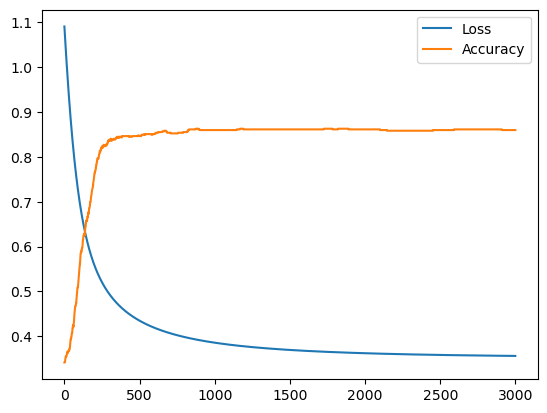

Accuracy: 0.8393939137458801


In [83]:
class LogReg2(nn.Module):
    def __init__(self):
        super(LogReg2, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x).sigmoid()
    
model = LogReg2()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

losses = []
accs = []
for ep in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad() 

    losses.append(loss.item())
    acc = accuracy(y_pred, y_train)
    accs.append(acc.item())

    if ep % (epochs/10) == 0:
        print(f'Epoch: {ep:5d}, Loss: {loss.item():.5f}')

plt.plot(losses, label='Loss')
plt.plot(accs, label='Accuracy')
plt.legend()
plt.show()

with torch.no_grad():
    y_pred = model(X_test)
    y_pred_cls = y_pred.round()
    acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'Accuracy: {acc.item()}')

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

c:\Users\myalla\anaconda3\envs\iisc\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

0.8333333333333334

### Breast Cancer Predict 

In [94]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
X.shape,y.shape 

((569, 30), (569,))

In [95]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).view(y_train.shape[0], 1)
y_test = torch.from_numpy(y_test.astype(np.float32)).view(y_test.shape[0], 1)

X_train.shape, y_train.shape , X_test.shape, y_test.shape


(torch.Size([381, 30]),
 torch.Size([381, 1]),
 torch.Size([188, 30]),
 torch.Size([188, 1]))

In [96]:
input_size = X_train.shape[1]
output_size = 1
learning_rate = 0.01
epochs = 3000

Epoch: 0, Loss: 1.0699399709701538, Accuracy: 0.7322834730148315
Epoch: 300, Loss: 0.33208566904067993, Accuracy: 0.8897637724876404
Epoch: 600, Loss: 0.1938670128583908, Accuracy: 0.9212598204612732
Epoch: 900, Loss: 0.13612279295921326, Accuracy: 0.9396325349807739
Epoch: 1200, Loss: 0.10917937010526657, Accuracy: 0.9501312375068665
Epoch: 1500, Loss: 0.09583600610494614, Accuracy: 0.9580052495002747
Epoch: 1800, Loss: 0.08825372904539108, Accuracy: 0.9632545709609985
Epoch: 2100, Loss: 0.08336843550205231, Accuracy: 0.9685039520263672
Epoch: 2400, Loss: 0.07995055615901947, Accuracy: 0.9711285829544067
Epoch: 2700, Loss: 0.0774194672703743, Accuracy: 0.9737532734870911


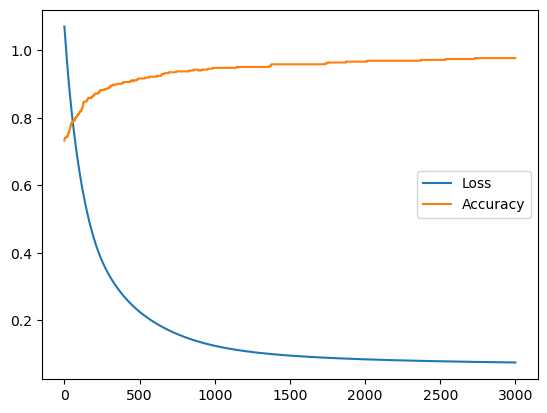

In [104]:
weights = torch.randn(input_size, output_size, requires_grad=True)
bias = torch.zeros(output_size, requires_grad=True)

def sigmoid(x):
    return 1/(1 + torch.exp(-x))

def model(x):
    return sigmoid(x @ weights + bias)

def cross_entropy(y_hat, y):
    return -(y * torch.log(y_hat) + (1-y) * torch.log(1-y_hat)).mean()

def accuracy(y_hat, y):
    y_hat_cls = y_hat > 0.5
    return (y_hat_cls == y).float().mean()

losses = []
accs = []

for epoch in range(epochs):
    y_hat = model(X_train)
    loss = cross_entropy(y_hat, y_train)
    loss.backward()
    with torch.no_grad():
        weights -= weights.grad * learning_rate
        bias -= bias.grad * learning_rate
        _ = weights.grad.zero_()
        _ = bias.grad.zero_()
    acc = accuracy(y_hat, y_train)
    losses.append(loss.item())
    accs.append(acc.item())
    if epoch % (epochs/10) == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}, Accuracy: {acc.item()}')

plt.plot(losses, label='Loss')
plt.plot(accs, label='Accuracy')
plt.legend()
plt.show()

In [89]:
y_pred = model(X_test)
print(f'loss : {cross_entropy(y_pred, y_test).item()}')
print(f'Accuracy: {accuracy(y_pred, y_test).item()}')

loss : 0.105169877409935
Accuracy: 0.957446813583374


Epoch:     0, Loss: 0.92270
Epoch:   300, Loss: 0.15119
Epoch:   600, Loss: 0.11730
Epoch:   900, Loss: 0.10265
Epoch:  1200, Loss: 0.09399
Epoch:  1500, Loss: 0.08809
Epoch:  1800, Loss: 0.08375
Epoch:  2100, Loss: 0.08038
Epoch:  2400, Loss: 0.07768
Epoch:  2700, Loss: 0.07545


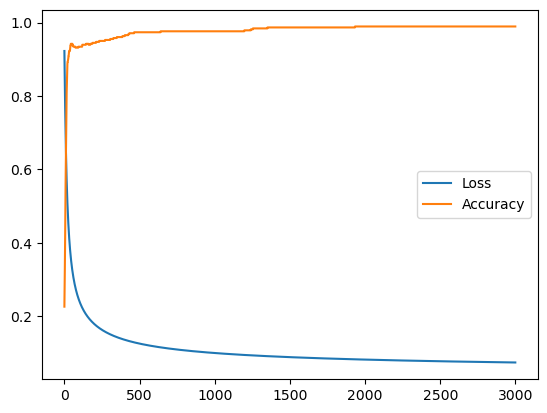

Accuracy: 0.9627659320831299


In [105]:
class LogReg2(nn.Module):
    def __init__(self):
        super(LogReg2, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x).sigmoid()
    
model = LogReg2()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

losses = []
accs = []
for ep in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad() 

    losses.append(loss.item())
    acc = accuracy(y_pred, y_train)
    accs.append(acc.item())

    if ep % (epochs/10) == 0:
        print(f'Epoch: {ep:5d}, Loss: {loss.item():.5f}')

plt.plot(losses, label='Loss')
plt.plot(accs, label='Accuracy')
plt.legend()
plt.show()

with torch.no_grad():
    y_pred = model(X_test)
    y_pred_cls = y_pred.round()
    acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'Accuracy: {acc.item()}')

In [91]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

c:\Users\myalla\anaconda3\envs\iisc\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

0.9680851063829787

# BATCH TRAINING

Terminology 

* epoch : 1 forward and 1 backward pass of all training "samples"
* batch_size = #examples in sample
* #iteratinos = #passes using batch sized samples 
  * Ex: 100 samples , bs = 20 -> #iters = 5

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [134]:
samples = 2**16
dims  = 25
M = 2
X , y = make_classification(n_samples=samples, n_features=dims, n_classes=M, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=np.random.rand()/4, random_state=1)

X_train.shape, y_train.shape , X_test.shape, y_test.shape
X_train.dtype , y_train.dtype
X_train[:2], y_train[:2]

((64787, 25), (64787,), (749, 25), (749,))

(dtype('float64'), dtype('int32'))

(array([[-0.52982065, -0.59229658, -1.65772081, -0.71046459, -1.66940925,
          0.08581445, -0.24818993,  0.56256308,  0.06518712, -1.15197559,
         -1.10849765,  0.34828554, -1.05846641,  1.1356589 , -0.70855393,
         -0.49558513,  0.91980088, -0.8426736 ,  1.09393182,  0.32928122,
          0.40420563, -0.70257605, -0.02015734, -0.91085232,  2.17951838],
        [ 0.32159852,  0.89707667,  0.98687399,  1.03244499, -0.55380277,
          2.05694563, -0.59034791,  0.16105166,  0.76636076, -0.90910772,
          0.01920751, -0.47833222, -1.90578146,  0.0341443 ,  0.21652161,
          2.23585575,  1.06921245, -1.04763074,  1.75137242, -0.17073487,
          0.19593061, -0.01896602, -1.50750327, -0.01078951, -1.59675092]]),
 array([1, 1]))

In [135]:
batch_size = 32
n_iter = np.ceil(samples // batch_size ).astype(int)
samples, n_iter , batch_size

(65536, 2048, 32)

In [136]:
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))#.view(y_train.shape[0], 1)
y_test = torch.from_numpy(y_test.astype(np.float32))#.view(y_test.shape[0], 1)

In [138]:
model = nn.Linear(dims, M)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    for i in range(n_iter):
        start = i * batch_size
        y_hat = model(X_train[start:start + batch_size])
        loss = criterion(y_hat, y_train[start:start + batch_size].long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    if epoch % (epochs/10) == 0:
        print(f'Epoch: {epoch}, Iteration: {i}, Loss: {loss.item()}')

Epoch: 0, Iteration: 2047, Loss: nan


KeyboardInterrupt: 